Question 1

In [ ]:
n=65; sumx=24890
alpha=1; beta=0.01;
pmean=(alpha+sumx)/(beta+n)
L=qgamma(0.025,alpha+sumx,beta+n) 
U=qgamma(0.975,alpha+sumx,beta+n) 
cat("Posterior mean: ",pmean," (",L,",",U,")")

Posterior mean:  382.8796  ( 1598123 , 1638328 )

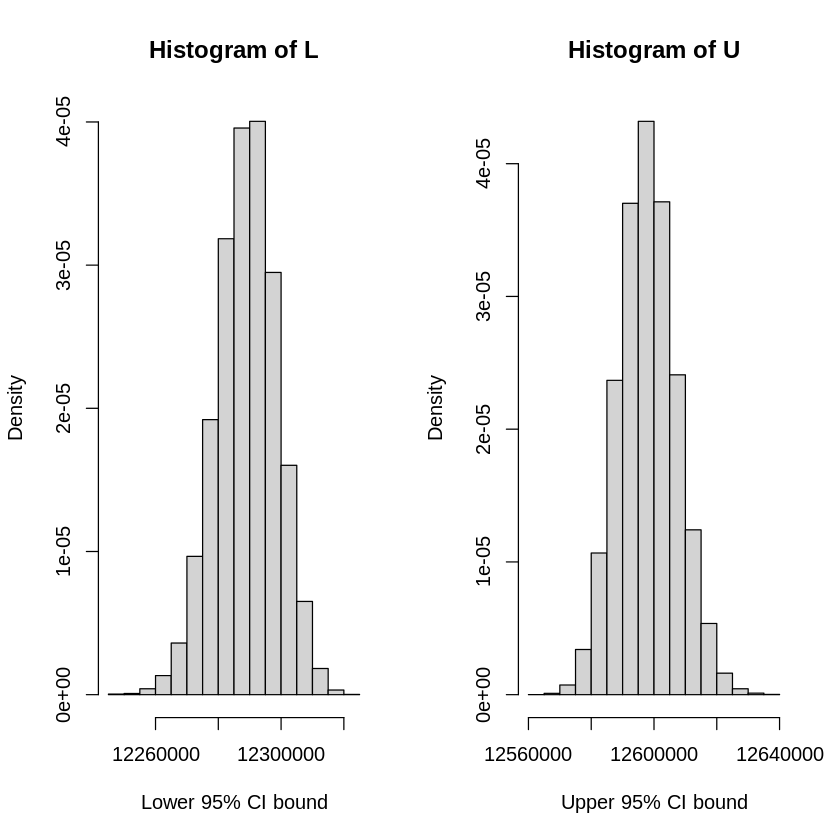

In [ ]:
n = 500
shape = alpha+sumx
scale = beta+n
sig_level = 0.05

for (i in 1:100) {

  data = sort(rgamma(n, shape, scale = scale))

  lower_bound = sig_level/2
  L[i] = data[lower_bound*n]

  upper_bound = 1-(sig_level/2)
  U[i] = (data[upper_bound*n])

}

par(mfrow=c(1,2))
# plot.new()
hist(L,probability=T,xlab="Lower 95% CI bound")
# points(qgamma(0.025,alpha+sumx,beta+n),0,pch=16,col=2) 
hist(U,probability=T,xlab="Upper 95% CI bound") 
# points(qgamma(0.975,alpha+sumx,beta+n),0,pch=16,col=2) 

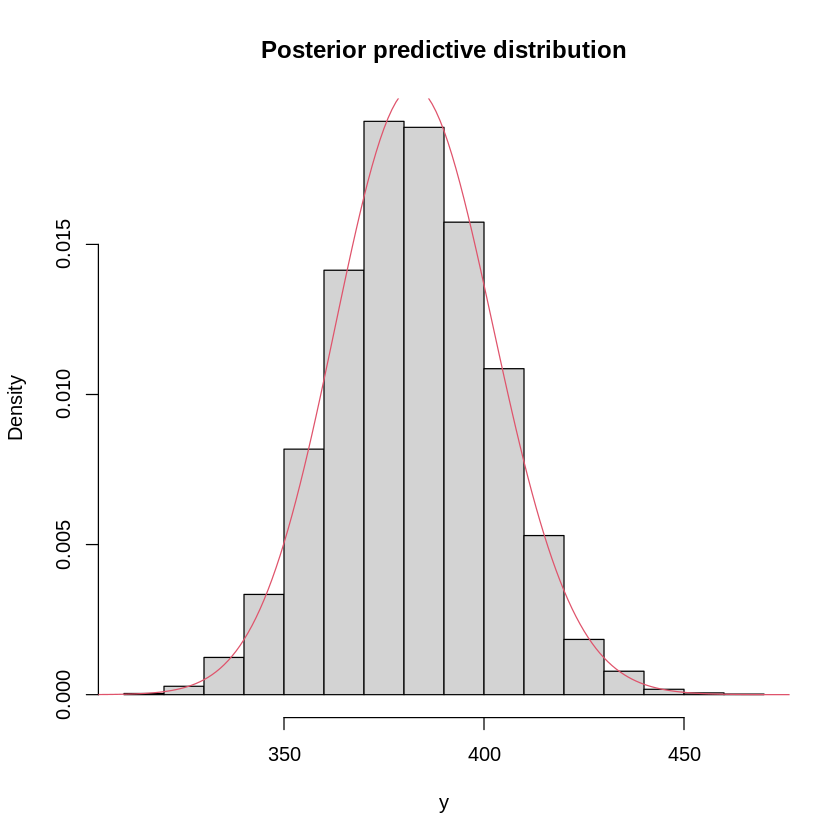

In [ ]:
3alpha=1; beta=0.01
sumx=24890; n=65
theta=rgamma(5000,alpha+sumx,beta+n)
y=rpois(5000,theta)
hist(y,probability=T,ylab="Density",main="Posterior predictive distribution") 
xx=300:500
pr=dnbinom(xx,sumx+alpha,1-1/(beta+n+1))
lines(xx,pr,col=2) # The (incorrect) continuous version - ok as an approx.

redo

question 1 (b)

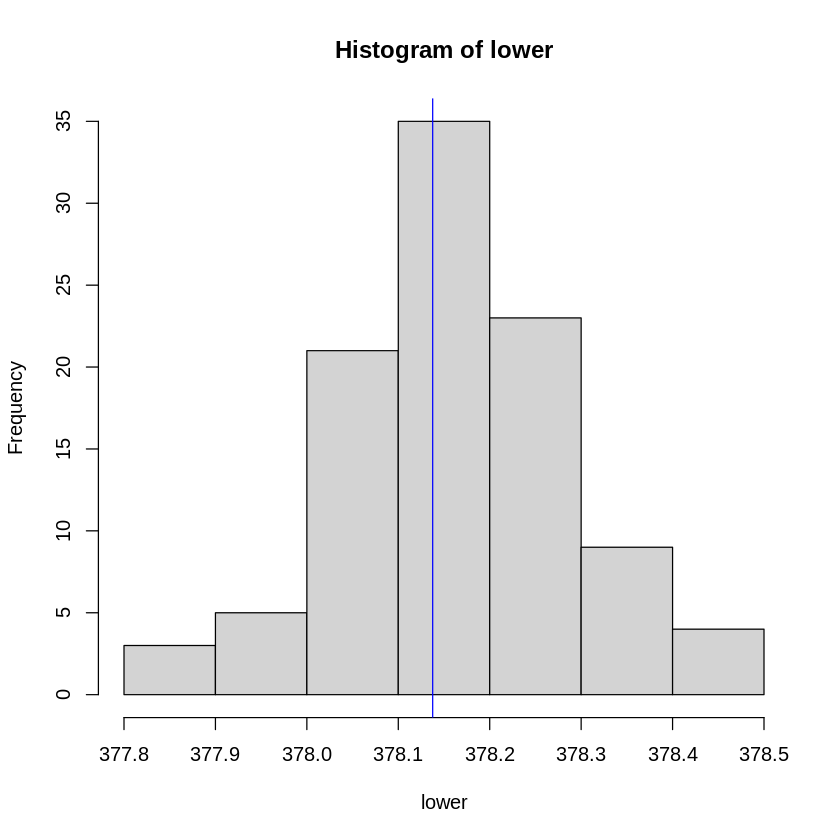

In [ ]:

alpha = 0.05
N = 2500
lower = upper = NULL

for (i in 1:100) {

  samples = rgamma(N, 1 + 24890, 0.01 + 65)
  quantiles = quantile(samples, c(alpha/2,1-alpha/2))

  lower = c(lower, quantiles[[1]])
  upper = c(upper, quantiles[[2]])
}

hist(lower)
abline(v = qgamma(alpha/2, 1 + 24890, 0.01 + 65), col = 'blue')

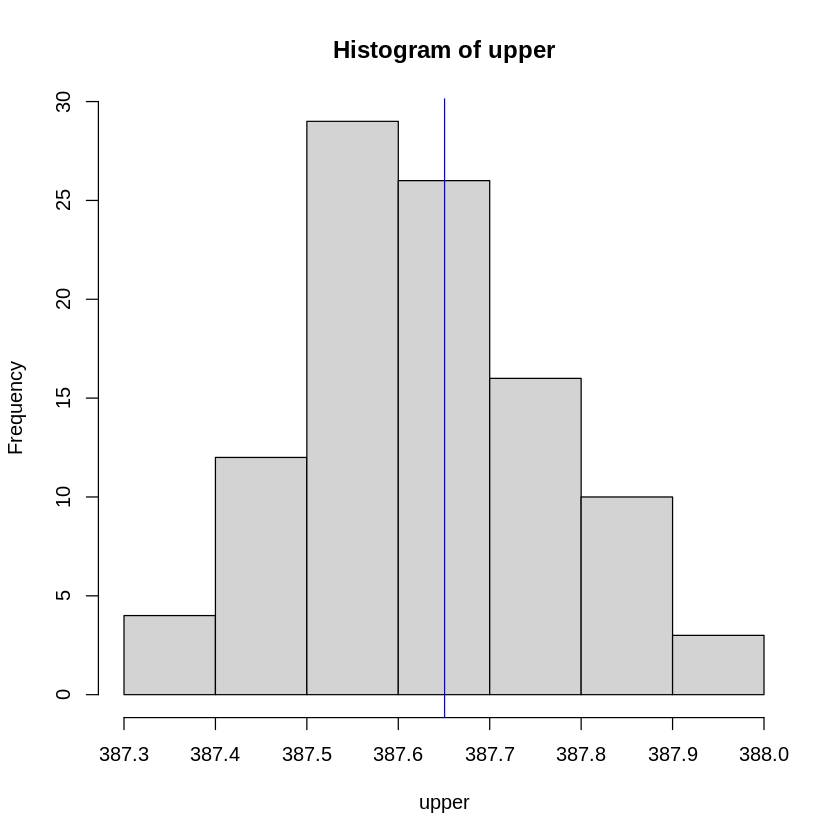

In [ ]:
hist(upper)
abline(v = qgamma(1-alpha/2, 1 + 24890, 0.01 + 65), col = 'blue')

question 1 (c)

[1] "true mean"


[1] 382.8796

[1] "predicted mean"


[1] 382.686

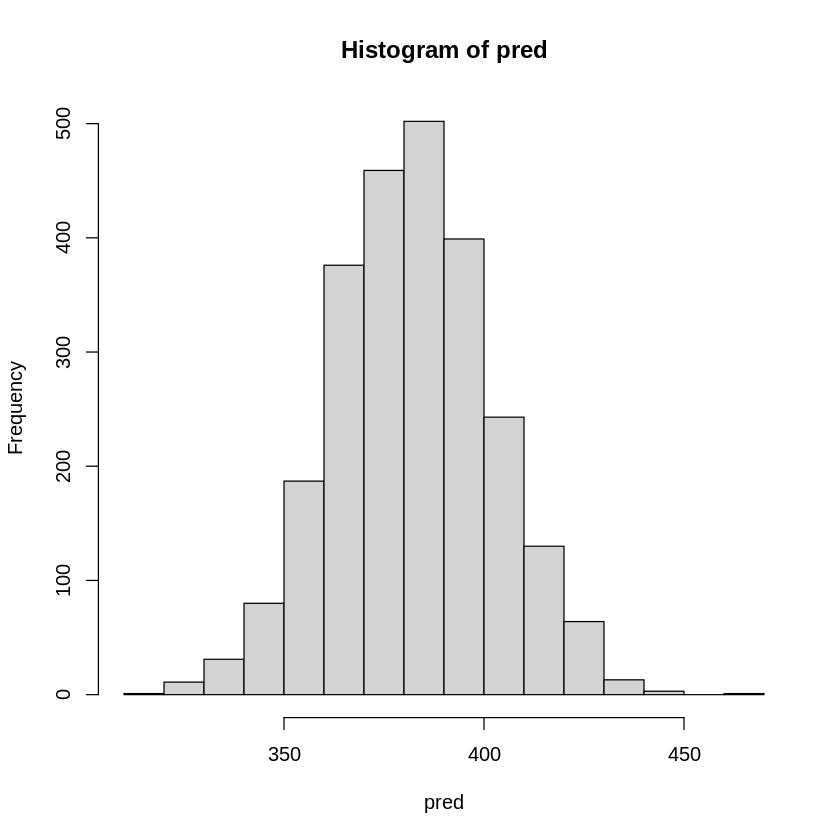

In [ ]:
N = 2500
alpha = 1
beta = 0.01
n = 65
sum_xi = 24890

posterior = rgamma(N, alpha + sum_xi, beta + n)
theta = rgamma(N, alpha, beta)
pred = rpois(N, posterior)

print('true mean')
(alpha + sum_xi)/(beta + n)

print('predicted mean')
mean(pred)

hist(pred)
# x = seq(from = 0, to = 100, length = 10)
# lines(x, dnbinom(x, alpha + sum_xi, 1/(beta + n + 1)))

[1] 383.262

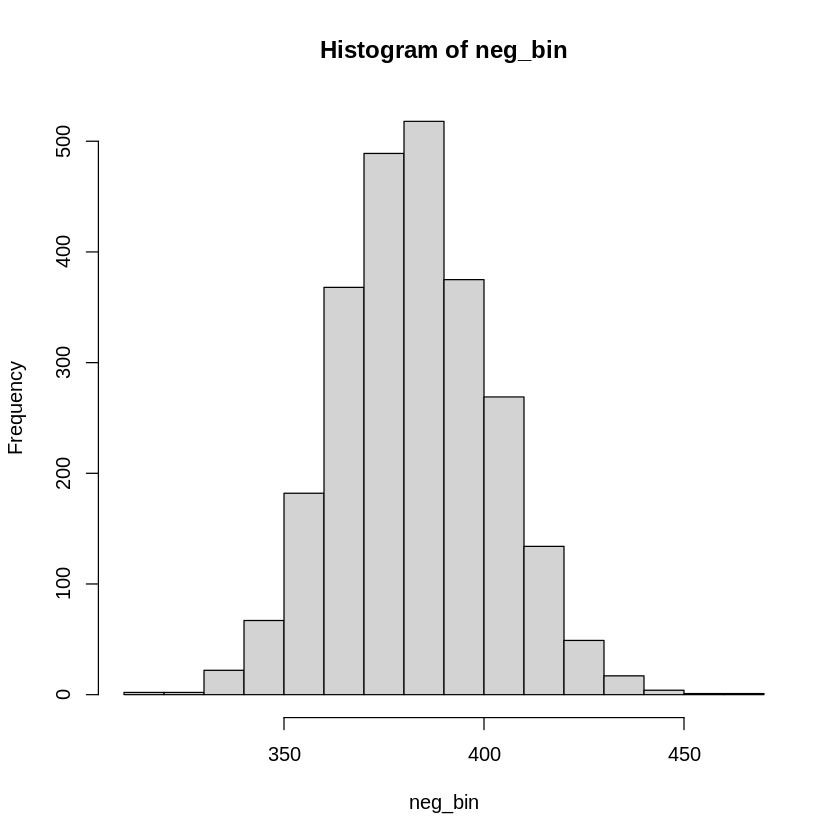

In [ ]:
neg_bin = rnbinom(N, alpha + sum_xi, 1-1/(beta + n + 1))
mean(neg_bin)
hist(neg_bin)